## FEEG6003 Introduction to Pandas demonstration

#### Import pandas library as pd

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = 5, 10
%matplotlib inline

## Hampshire police data example

#### Reading in multiple .csv files using iPython magic commands
#### Using pandas to merge the data into one data frame

In [2]:
files = !ls ./police/*/*.csv # IPython magic to find csv files in different folders
police_data = pd.concat([pd.read_csv(f) for f in files])
police_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.147727,51.353443,On or near The Beeches,E01022553,Basingstoke and Deane 001A,Anti-social behaviour,NaN,NaN
1,NaN,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.147727,51.353443,On or near The Beeches,E01022553,Basingstoke and Deane 001A,Anti-social behaviour,NaN,NaN
2,11d1dc5bcf3f349c84f3ef9982a71f8a019516814bc63d...,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.146835,51.349633,On or near Sarisbury Close,E01022553,Basingstoke and Deane 001A,Burglary,Investigation complete; no suspect identified,NaN
3,b05186dfd8a67f327d3019ccc130aeffb7fc35489aea99...,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.144108,51.354973,On or near Honeybottom Road,E01022553,Basingstoke and Deane 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
4,a50b6917a9b9b0ba26a236ebe5f4a85681f1283e9dd9c9...,2014-02,Hampshire Constabulary,Hampshire Constabulary,-1.147727,51.353443,On or near The Beeches,E01022553,Basingstoke and Deane 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN


#### Discarding the columns we are not interested in using the drop command

In [3]:
discarded_columns = ['Longitude', 'Latitude', 'Crime ID', 'Reported by', 'Falls within', 'LSOA code', 'LSOA name', 'Last outcome category', 'Context']

In [4]:
police_data = police_data.drop(discarded_columns, axis=1)
police_data.head()

,Month,Location,Crime type
0,2014-02,On or near The Beeches,Anti-social behaviour
1,2014-02,On or near The Beeches,Anti-social behaviour
2,2014-02,On or near Sarisbury Close,Burglary
3,2014-02,On or near Honeybottom Road,Criminal damage and arson
4,2014-02,On or near The Beeches,Criminal damage and arson


#### Convert the month column into pandas date type

In [5]:
police_data['Month'] = pd.to_datetime(police_data['Month'])

#### Obtain the possible crime types

In [6]:
crime_types = pd.unique(police_data['Crime type'])
crime_types

array(['Anti-social behaviour', 'Burglary', 'Criminal damage and arson',
       'Other theft', 'Violence and sexual offences', 'Public order',
       'Shoplifting', 'Drugs', 'Possession of weapons', 'Vehicle crime',
       'Other crime', 'Theft from the person', 'Robbery', 'Bicycle theft'], dtype=object)

## Burgess road crime statistics

#### Sorting the data by location, and searching for the road we are interested in. The head command prints the first 5 entries.

In [7]:
university_crime = police_data[police_data['Location'].str.contains("Burgess Road")]
print(np.shape(university_crime))
university_crime.head()

(192, 3)


,Month,Location,Crime type
7181,2014-02-01,On or near Burgess Road,Burglary
7185,2014-02-01,On or near Burgess Road,Public order
336,2014-03-01,On or near Burgess Road,Criminal damage and arson
341,2014-03-01,On or near Burgess Road,Violence and sexual offences
8594,2014-03-01,On or near Burgess Road,Anti-social behaviour


#### Alternatively, use array slicing to obtain the sub-section required

In [8]:
university_crime[:5]

,Month,Location,Crime type
7181,2014-02-01,On or near Burgess Road,Burglary
7185,2014-02-01,On or near Burgess Road,Public order
336,2014-03-01,On or near Burgess Road,Criminal damage and arson
341,2014-03-01,On or near Burgess Road,Violence and sexual offences
8594,2014-03-01,On or near Burgess Road,Anti-social behaviour


#### Filtering the data for the type of criminal behaviour, we choose bicycle theft.

In [9]:
university_crime_type = university_crime[university_crime['Crime type'].str.contains("Bicycle")]
print(np.shape(university_crime_type))
university_crime_type

(6, 3)


,Month,Location,Crime type
440,2014-07-01,On or near Burgess Road,Bicycle theft
9080,2014-12-01,On or near Burgess Road,Bicycle theft
10901,2015-03-01,On or near Burgess Road,Bicycle theft
10902,2015-03-01,On or near Burgess Road,Bicycle theft
10773,2015-04-01,On or near Burgess Road,Bicycle theft
11745,2015-06-01,On or near Burgess Road,Bicycle theft


#### List the possible criminal offenses by using the 'unique' command

In [10]:
crime_list = pd.unique(police_data['Crime type'])
crime_list

array(['Anti-social behaviour', 'Burglary', 'Criminal damage and arson',
       'Other theft', 'Violence and sexual offences', 'Public order',
       'Shoplifting', 'Drugs', 'Possession of weapons', 'Vehicle crime',
       'Other crime', 'Theft from the person', 'Robbery', 'Bicycle theft'], dtype=object)

#### Count the number of each crime type on Burgess road

In [11]:
university_crime_count = university_crime['Crime type'].value_counts()
university_crime_count

Anti-social behaviour           84
Public order                    20
Violence and sexual offences    18
Criminal damage and arson       17
Burglary                        16
Other theft                     13
Drugs                            8
Bicycle theft                    6
Vehicle crime                    5
Other crime                      2
Shoplifting                      2
Possession of weapons            1
Name: Crime type, dtype: int64

#### Plot the crime counts as a bar chart

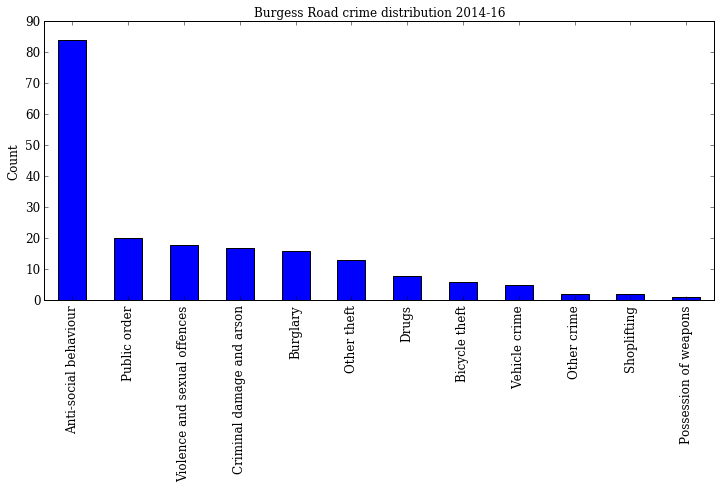

In [12]:
ax = university_crime_count.plot(kind='bar',figsize=(12, 5),title='Burgess Road crime distribution 2014-16', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

#### Count the number of crimes in Burgess road per month over the past 2 years

In [13]:
university_crime_monthly = university_crime['Month'].value_counts()
university_crime_monthly

2015-03-01    25
2015-06-01    18
2014-07-01    14
2014-11-01    13
2015-04-01    12
2014-08-01    10
2015-07-01     9
2015-05-01     9
2014-09-01     8
2014-06-01     8
2016-01-01     6
2015-12-01     6
2015-11-01     6
2014-12-01     5
2015-01-01     5
2014-04-01     5
2015-10-01     5
2015-08-01     5
2014-10-01     4
2015-09-01     4
2016-02-01     4
2014-03-01     3
2015-02-01     3
2014-05-01     3
2014-02-01     2
Name: Month, dtype: int64

#### Plot the monthly crime count for Burgess road

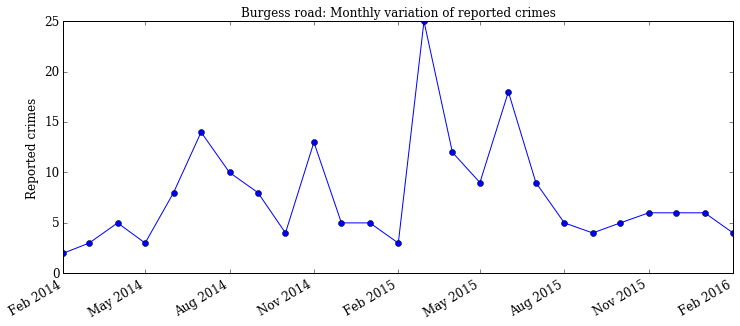

In [14]:
ax2 = university_crime_monthly.plot(kind='line',marker='o',figsize=(12, 5),title='Burgess road: Monthly variation of reported crimes', fontsize=12)
ax2.set_ylabel('Reported crimes', fontsize=12)

## Hampshire crime statistics

#### Comparing the crimes for December 2014 and 2015

In [15]:
xmas2014= police_data[police_data.Month == '2014-12-01']
xmas2015= police_data[police_data.Month == '2015-12-01']
xmas2015.head()

,Month,Location,Crime type
0,2015-12-01,On or near Glendale Road,Anti-social behaviour
1,2015-12-01,On or near Stanfield,Anti-social behaviour
2,2015-12-01,On or near Stanfield,Violence and sexual offences
3,2015-12-01,On or near Searing Way,Anti-social behaviour
4,2015-12-01,On or near Inhurst Way,Other theft


#### Text summary of the top crime statistics for the two months

In [16]:
xmas2014['Crime type'].value_counts().head()

Anti-social behaviour           4705
Violence and sexual offences    1653
Criminal damage and arson       1332
Burglary                         971
Other theft                      971
Name: Crime type, dtype: int64

In [17]:
xmas2015['Crime type'].value_counts().head()

Anti-social behaviour           4561
Violence and sexual offences    2267
Criminal damage and arson       1462
Burglary                         927
Shoplifting                      913
Name: Crime type, dtype: int64

#### Comparing the crime rate sorted by offense type on the same bar chart

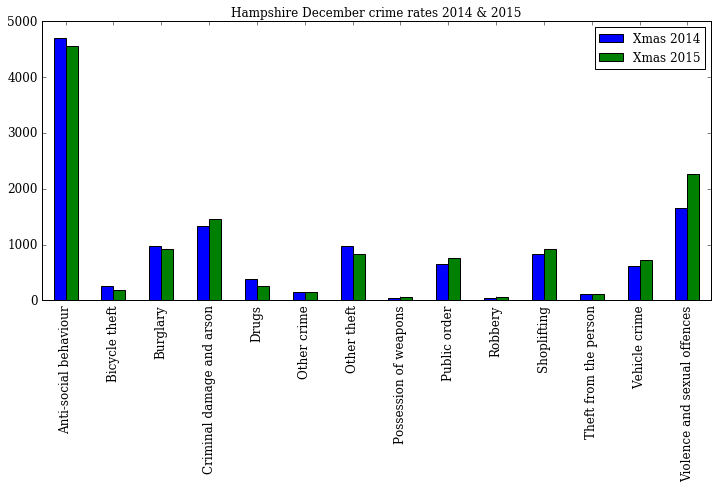

In [18]:
xmas2014_count = xmas2014['Crime type'].value_counts()
xmas2014_count.name = 'Xmas 2014'
xmas2015_count = xmas2015['Crime type'].value_counts()
xmas2015_count.name = 'Xmas 2015'
new_xmas = pd.concat([xmas2014_count, xmas2015_count], axis=1)
new_xmas.plot(kind='bar', figsize=(12, 5),title='Hampshire December crime rates 2014 & 2015', fontsize=12)

#### Grouping by Month and crime type to see the most common locations for each crime per month

#### Generic locations reported by the police dominate the data set over individual roads

In [19]:
group_by_example = police_data.groupby(['Month', 'Crime type']).describe()
group_by_example

Location
Month      Crime type                                                   
2014-02-01 Anti-social behaviour        count                       3893
                                        unique                      2097
                                        top       On or near Supermarket
                                        freq                         187
           Bicycle theft                count                        222
                                        unique                       161
                                        top     On or near Shopping Area
                                        freq                          11
           Burglary                     count                        758
                                        unique                       581
                                        top      On or near Parking Area
                                        freq                          27
           Criminal damage and arson    count                       1197
                                        unique                       847
                                        top      On or near Parking Area
                                        freq                          48
           Drugs                        count                        420
                                        unique                       290
                                        top      On or near Parking Area
                                        freq                          30
           Other crime                  count                        124
                                        unique                       103
                                        top     On or near Shopping Area
                                        freq                           5
           Other theft                  count                        645
                                        unique                       439
                                        top       On or near Supermarket
                                        freq                          40
           Possession of weapons        count                         46
                                        unique                        44
...                                                                  ...
2016-02-01 Other theft                  top       On or near Supermarket
                                        freq                          48
           Possession of weapons        count                         67
                                        unique                        50
                                        top       On or near Supermarket
                                        freq                           9
           Public order                 count                        778
                                        unique                       501
                                        top       On or near Supermarket
                                        freq                          61
           Robbery                      count                         52
                                        unique                        36
                                        top      On or near Parking Area
                                        freq                           6
           Shoplifting                  count                        969
                                        unique                       186
                                        top       On or near Supermarket
                                        freq                         300
           Theft from the person        count                         92
                                        unique                        60
                                        top       On or near Supermarket
                                        freq                          11
           Vehicle crime                count    

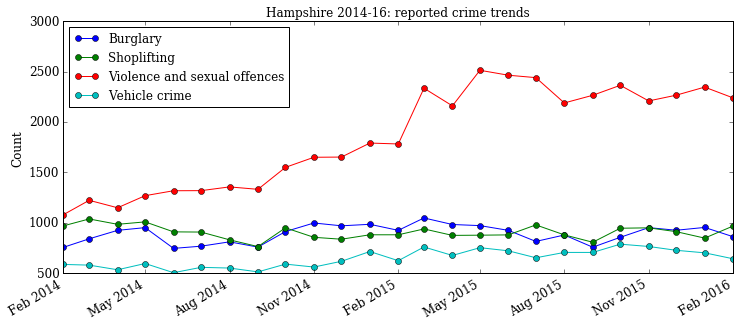

In [20]:
crimes = ['Burglary', 'Shoplifting', 'Violence and sexual offences','Vehicle crime']
for crime in crimes: 
    crime_sort = police_data[police_data['Crime type'].str.contains(crime)]
    monthlycount = crime_sort['Month'].value_counts()
    ax3 = monthlycount.plot(kind='line',marker='o', label=crime,figsize=(12, 5),\
                            title='Hampshire 2014-16: reported crime trends', fontsize=12)
ax3.set_ylabel("Count", fontsize=12)
ax3.legend(loc="best")

#### Variation in total number of reported crimes over the two year period

In [21]:
hampshire_crime_monthly = police_data['Month'].value_counts()

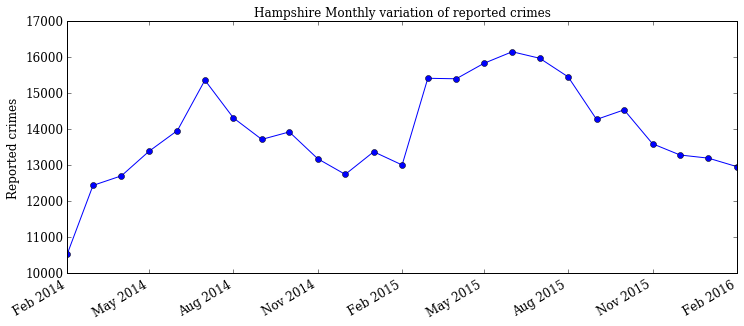

In [22]:
ax2 = hampshire_crime_monthly.plot(kind='line',marker='o',figsize=(12, 5),title='Hampshire Monthly variation of reported crimes', fontsize=12)
ax2.set_ylabel('Reported crimes', fontsize=12)

## Converting Numpy data to LaTeX

#### We create some numerical data in numpy arrays, hstack into one large array

#### Manually add some NaN entries to the data set for removal

In [23]:
x = np.linspace(0,9,10).reshape([10,1])*5
y = np.linspace(10,19,10).reshape([10,1])*10
z = np.random.rand(10).reshape([10,1])*15
output = np.hstack((x,y,z))
output[3,1] = np.nan
output[7,2] = np.nan

In [24]:
column_labels = ['X', 'Y', 'Z']
output_dataframe = pd.DataFrame(output, columns = column_labels)
output_dataframe

,X,Y,Z
0,0.0,100.0,11.179084
1,5.0,110.0,9.748751
2,10.0,120.0,7.505129
3,15.0,NaN,3.950354
4,20.0,140.0,13.140722
5,25.0,150.0,4.249103
6,30.0,160.0,13.087476
7,35.0,170.0,NaN
8,40.0,180.0,8.898929
9,45.0,190.0,0.856822


#### Use the pandas 'dropna' command to remove all rows containing missing data. Alternatively these can be set to a desired value.

In [25]:
output_dataframe = output_dataframe.dropna()
output_dataframe

,X,Y,Z
0,0.0,100.0,11.179084
1,5.0,110.0,9.748751
2,10.0,120.0,7.505129
4,20.0,140.0,13.140722
5,25.0,150.0,4.249103
6,30.0,160.0,13.087476
8,40.0,180.0,8.898929
9,45.0,190.0,0.856822


#### Output the table to LaTex with to_latex command, index=None removes the row numbering

#### Need to use the /usepackage{booktabs} command in the LaTeX document

In [26]:
print(output_dataframe.to_latex(index=None))

\begin{tabular}{rrr}
\toprule
    X &      Y &          Z \\
\midrule
  0.0 &  100.0 &  11.179084 \\
  5.0 &  110.0 &   9.748751 \\
 10.0 &  120.0 &   7.505129 \\
 20.0 &  140.0 &  13.140722 \\
 25.0 &  150.0 &   4.249103 \\
 30.0 &  160.0 &  13.087476 \\
 40.0 &  180.0 &   8.898929 \\
 45.0 &  190.0 &   0.856822 \\
\bottomrule
\end{tabular}



## Short example of using Pandas with statsmodels package for a simple least squares linear regression

In [27]:
import statsmodels.api as sm

### Create two arrays of data

In [28]:
Dispensers = np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6])
Sales = np.array([508.1, 498.4, 568.2, 577.3, 651.7, 657.0, 713.4, 697.5, 755.3, 758.9, 787.6, 792.1, 841.4, 831.8])

### Fit the linear model and produce a regression summary

In [29]:
Data = { 'Dispensers': Dispensers,
        'Sales': Sales}
df = pd.DataFrame(Data,columns=['Dispensers','Sales'])
linear_model1 = sm.formula.ols(formula='Sales ~ Dispensers',data=df).fit()
linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     545.5
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           2.26e-11
Time:                        19:03:27   Log-Likelihood:                -58.927
No. Observations:                  14   AIC:                             121.9
Df Residuals:                      12   BIC:                             123.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    523.8000      8.474     61.812      0.000       505.337   542.263
Dispensers    54.8929      2.350     23.356      0.000        49.772    60.014
==============================================================================
Omnibus:                        2.979   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.111
Skew:                           0.103   Prob(JB):                        0.574
Kurtosis:                       1.635   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the residual summary

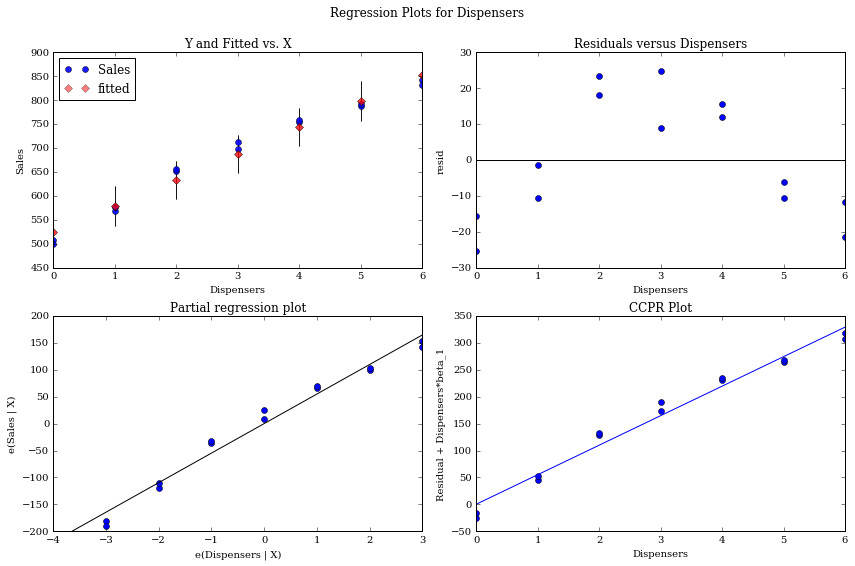

In [30]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(linear_model1,'Dispensers',fig=fig)

### Improving the model with a squared term, the R-Squared value has increased

In [31]:
Data = { 'Dispensers': Dispensers,
        'Dispensers2': Dispensers**2,
        'Sales': Sales}
df2 = pd.DataFrame(Data,columns=['Dispensers','Sales','Dispensers2'])
linear_model2 = sm.formula.ols(formula='Sales ~ Dispensers+Dispensers2',data=df2).fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1391.
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           5.95e-14
Time:                        19:03:29   Log-Likelihood:                -47.038
No. Observations:                  14   AIC:                             100.1
Df Residuals:                      11   BIC:                             102.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     502.5560      4.850    103.619      0.000       491.881   513.231
Dispensers     80.3857      3.786     21.232      0.000        72.053    88.719
Dispensers2    -4.2488      0.606     -7.008      0.000        -5.583    -2.914
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                0.919
Skew:                          -0.057   Prob(JB):                        0.632
Kurtosis:                       1.750   Cond. No.                         51.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

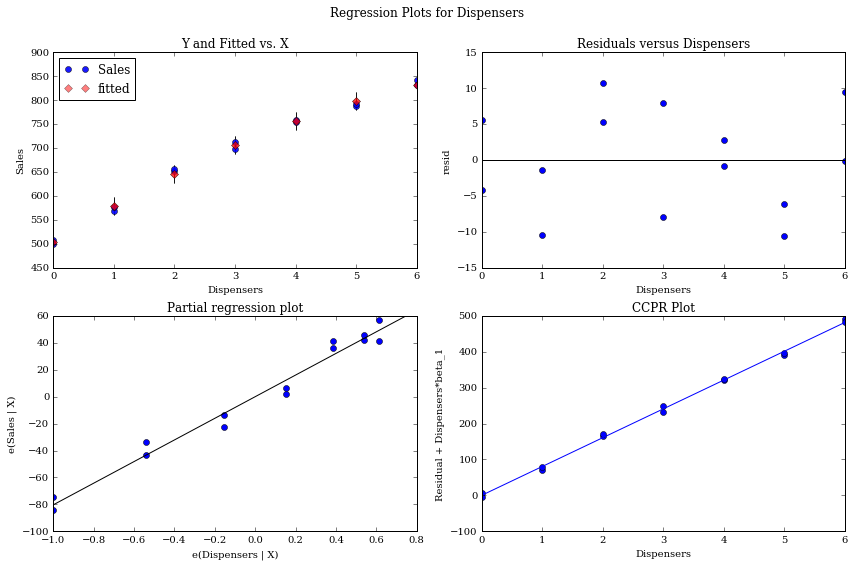

In [32]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(linear_model2,'Dispensers',fig=fig)

## Resources for further reading:

### 10 Minutes to Pandas: A good reference for dataframe manipulation. http://pandas.pydata.org/pandas-docs/stable/10min.html

### Pandas cookbook: Short notebooks with more examples using Pandas. https://github.com/jvns/pandas-cookbook

### Pandas notebook material from the 2015 NGCM CDT summer academy 2 day course. https://github.com/fonnesbeck/ngcm_pandas_course

### StatsModels: A package for statistical functions in Python, compatiable with Pandas. http://statsmodels.sourceforge.net